## BikeSharing Demand prediction 

In this notebook We will preidct the demand of bike sharing Regression prediction

About the data

Total records=8760

total independent features=12

dependent fetaure=1




## Import required Libraries

In [31]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
# Data from https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand
## Load the data using pandas and data in CSV file format
data=pd.read_csv("SeoulBikeData.csv",encoding="unicode_escape")

In [3]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Understang Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
Data=data.sort_values(by=["Date"])

In [7]:
Data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
724,31/12/2017,32,4,-0.2,87,3.5,246,-2.1,0.0,0.0,1.2,Winter,Holiday,Yes
723,31/12/2017,65,3,0.3,91,2.0,172,-1.0,0.0,1.0,1.2,Winter,Holiday,Yes
722,31/12/2017,65,2,0.4,95,1.7,110,-0.3,0.0,0.0,1.2,Winter,Holiday,Yes
732,31/12/2017,209,12,1.4,47,4.5,1388,-8.7,1.1,0.0,1.0,Winter,Holiday,Yes
743,31/12/2017,227,23,-2.6,40,0.6,2000,-14.3,0.0,0.0,0.0,Winter,Holiday,Yes


## Spliting The Date feature into 3 independent fetaures 

In [8]:
Data["Date"]=pd.to_datetime(Data["Date"])

In [9]:
Data['year'] = Data['Date'].dt.year
Data['month'] = Data['Date'].dt.month
Data['day'] = Data['Date'].dt.day

In [10]:
Data.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
767,2018-01-01,154,23,-1.6,51,0.7,1882,-10.4,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
766,2018-01-01,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1


In [11]:
Data=Data.drop("Date",axis=1)

In [12]:
Data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
744,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
767,154,23,-1.6,51,0.7,1882,-10.4,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
766,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
765,203,21,-0.9,44,1.2,1871,-11.6,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
764,206,20,-0.3,40,1.2,1936,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1


## Finding Correlation between attributes 

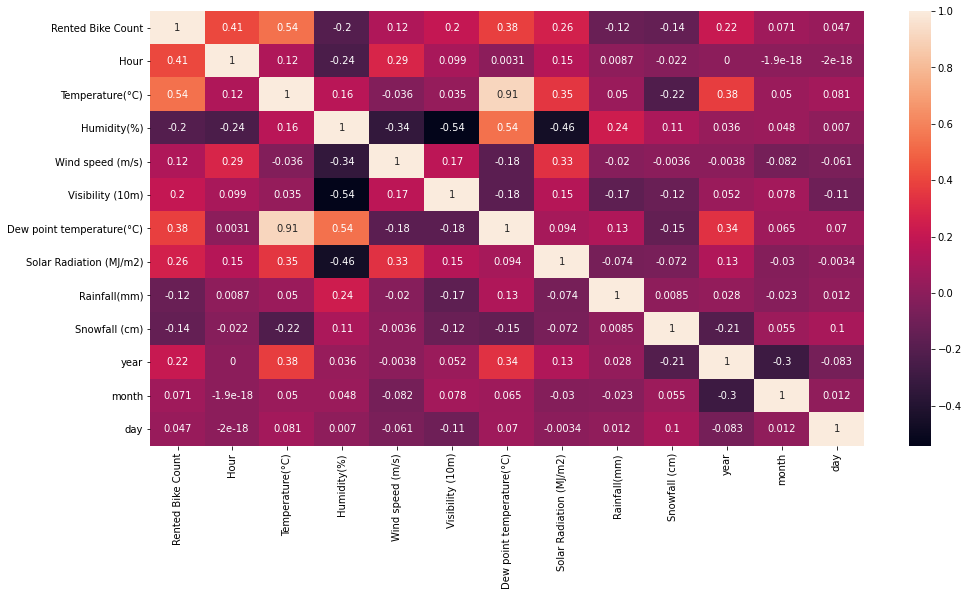

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(Data.corr(), annot=True)
plt.show()

In [14]:
#droping Due point point temparture has high correlation with temperature and Humidity so 
Data=Data.drop("Dew point temperature(°C)",axis=1)

In [15]:
Data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'year', 'month', 'day'],
      dtype='object')

In [16]:
Data["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

### we need to convert categorical data to numeric data.

In [17]:

le = LabelEncoder()

Data['Seasons'] = le.fit_transform(Data['Seasons'])
Data['Holiday'] = le.fit_transform(Data['Holiday'])
Data['Functioning Day'] = le.fit_transform(Data['Functioning Day'])

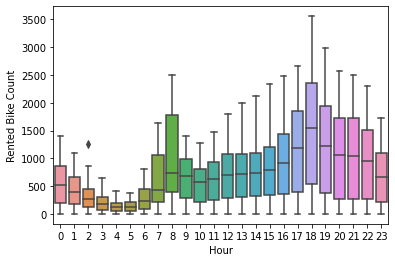

In [18]:

sns.boxplot(x='Hour',y='Rented Bike Count', data=Data)

 During morning and evening have many sharings happening 

(array([3055., 1479., 1299.,  910.,  514.,  406.,  250.,   61.,   26.,
          16.]),
 array([   0. ,  355.6,  711.2, 1066.8, 1422.4, 1778. , 2133.6, 2489.2,
        2844.8, 3200.4, 3556. ]),
 <a list of 10 Patch objects>)

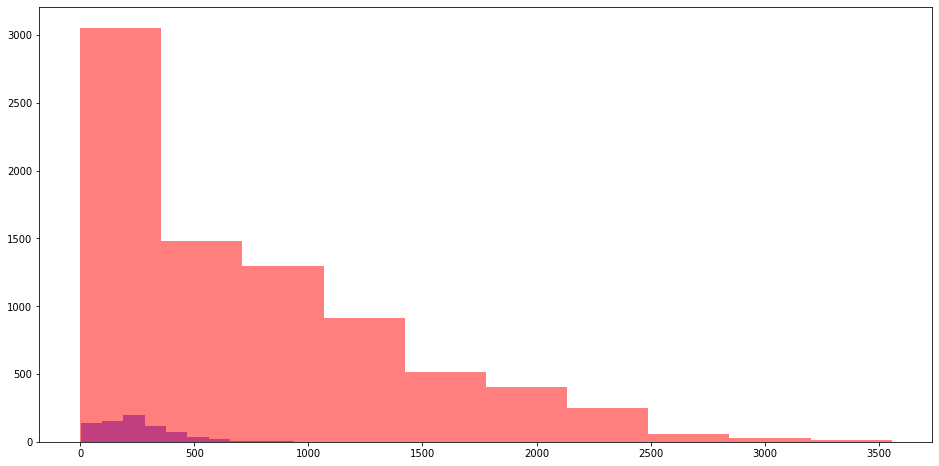

In [19]:
plt.figure(figsize=(16,8))
plt.hist(Data['Rented Bike Count'][Data['year'] == 2017], alpha=0.5, label='2017',color="blue")
plt.hist(Data['Rented Bike Count'][Data['year'] == 2018], alpha=0.5, label='2018', color='red')

In [20]:
Data["year"].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [21]:
Data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
744,206,0,-3.2,40,0.5,1358,0.0,0.0,0.0,3,0,1,2018,1,1
767,154,23,-1.6,51,0.7,1882,0.0,0.0,0.0,3,0,1,2018,1,1
766,168,22,-1.3,48,0.8,1927,0.0,0.0,0.0,3,0,1,2018,1,1
765,203,21,-0.9,44,1.2,1871,0.0,0.0,0.0,3,0,1,2018,1,1
764,206,20,-0.3,40,1.2,1936,0.0,0.0,0.0,3,0,1,2018,1,1


## Outliers Removal

In [22]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count           874.25
Hour                         11.50
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
Seasons                       1.00
Holiday                       0.00
Functioning Day               0.00
year                          0.00
month                         6.00
day                          15.00
dtype: float64


In [23]:
 ((Data < (Q1- 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))).sum()

Rented Bike Count          158
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)           161
Visibility (10m)             0
Solar Radiation (MJ/m2)    641
Rainfall(mm)               528
Snowfall (cm)              443
Seasons                      0
Holiday                    432
Functioning Day            295
year                       744
month                        0
day                          0
dtype: int64

In [24]:
df_without_outliers =Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
df_without_outliers.shape

(5853, 15)

In [26]:
df1=df_without_outliers.drop("Rented Bike Count",axis=1)
Y=df_without_outliers["Rented Bike Count"]

## Spliting the data into train and test 

In [27]:

X_train, X_test, y_train, y_test = train_test_split(df1,Y, test_size=0.2)

## Making all features in same Scale

if we have less number of outliers those are usufull to model then use standardization

as we already removed outliers using normalization



In [28]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)


## Model Comparision 

In [30]:

models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,np.ravel(y_train,order='C'))
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.4168808641326563,
  0.7592830312688416,
  0.4270417515645147,
  0.846824474811796,
  0.5576322493735346]}

In [32]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.416881
1,AdaBoostRegressor,0.759283
2,BaggingRegressor,0.427042
3,SVR,0.846824
4,KNeighborsRegressor,0.557632


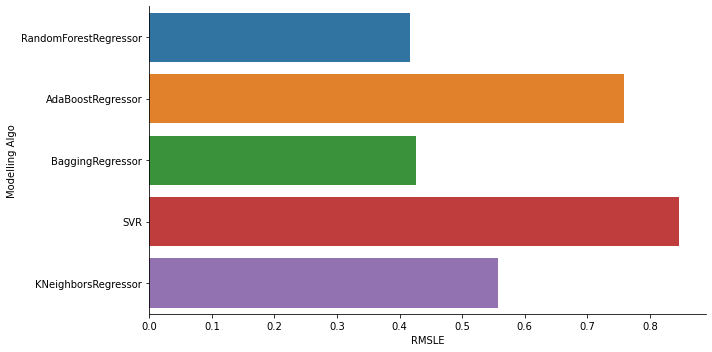

In [34]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

Since Random Forest regressor is giving less RMSLE value so we finalise the algorithm

next step is hyperparametre tunning

## Random Forest Model Hyperparameter Tuning

Using Gridsearch tuning hyperparameters

In [35]:
%time


depths=[1,5,50,100]
estimators=[1,5,50,100]
clf = RandomForestRegressor()

params = {'max_depth' : depths,
          'n_estimators':estimators  
          }

grid = GridSearchCV(estimator = clf,param_grid=params ,cv = 2,n_jobs = 3,scoring='r2')
grid.fit(X_train, np.ravel(y_train,order='C'))
print("best depth = ", grid.best_params_)
print("r2 value on train data = ", grid.best_score_*100)
a1 = grid.best_params_

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
best depth =  {'max_depth': 100, 'n_estimators': 100}
r2 value on train data =  84.16394831075529


In [36]:
optimal_depth1 = a1.get('max_depth')
optimal_bases1 = a1.get('n_estimators')

In [37]:
#import untill
clf = RandomForestRegressor(max_depth=optimal_depth1,n_estimators=optimal_bases1) 

clf.fit(X_train,np.ravel(y_train,order='C'))

pred = clf.predict(X_test)

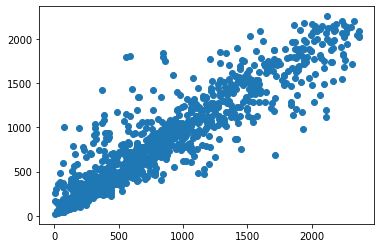

In [38]:
plt.scatter(y_test,pred)

In [39]:

print('r2_score:',r2_score(y_test,pred))

r2_score: 0.8582072177969001


## R2 value represents 
R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is the percentage of the dependent variable variation that a linear model explains.



0% represents a model that does not explain any of the variation in the response variable around its mean. 

The mean of the dependent variable predicts the dependent variable as well as the regression model.

100% represents a model that explains all of the variation in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations.

## Saving the Model

In [52]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load


In [51]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8582072177969001


# Thank You